In [5]:
import os
import json
import tensorflow as tf
import numpy as np

path_predict = os.path.join(os.getcwd(), 'predict')
model = tf.keras.models.load_model(path_predict)

path = os.path.join(os.getcwd(), 'input.json')
with open(path, 'r') as json_file:
  data = json.load(json_file)

x_axis = []
y_axis = []

for object in data.items():
  for coordinate in object[1]:
    for axis, value in coordinate.items():
      if axis == 'x':
        x_axis.append(value)
      if axis == 'y':
        y_axis.append(value)

SIZE_MATRIX = 64

def to_matrix(x, y):
    # when rounding to whole indexes, some values may get squashed
    # use SIZE_MATRIX - 1 and round
    matrix = np.zeros((SIZE_MATRIX, SIZE_MATRIX), dtype=int)
    
    def scale_resolution(axis):
        min_axis = np.min(axis)
        max_axis = np.max(axis)
        
        range_axis = max_axis - min_axis
        range_matrix = SIZE_MATRIX - 1
        
        return  np.round( (axis - min_axis) / range_axis * range_matrix ).astype(int)
    
    x = scale_resolution(x)
    y = scale_resolution(y)
    
    matrix[x, y] = 1
    return matrix.reshape((1, 64, 64, 1))

view = to_matrix(x_axis, y_axis)

view.shape


model = tf.keras.models.load_model('predict')

z = model.predict(view)


2023-09-21 13:55:18.495690: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 2s 2s/step


In [48]:
import numpy as np
from scipy.optimize import leastsq

def linear_regression(X, y):
  X = np.c_[np.ones((X.shape[0], 1)), X]
  return (np.linalg.inv(X.T @ X) @ X.T @ y).tolist()

def quadratic_regression(X, y):
  X = np.c_[np.ones_like(X), X, X**2]
  return (np.linalg.inv(X.T @ X) @ X.T @ y).tolist()
  
def cubic_regression(X, y):
  X = np.c_[np.ones_like(X), X, X**2, X**3]
  return (np.linalg.inv(X.T @ X) @ X.T @ y).tolist()

def sinusoidal_regression(X, y):
  optimize_func = lambda x: x[0]*np.sin(x[1]*X+x[2]) + x[3] - y
  est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [1, 1, 1, 1])[0]
  return [est_amp, est_freq, est_phase, est_mean]

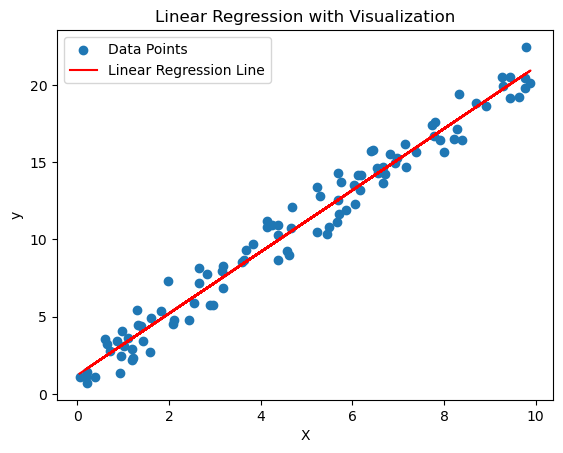

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Linear regression using NumPy
# X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]  # Add an intercept term
# coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
coefficients_linear = linear_regression(X, y)
z = coefficients_linear[0] + coefficients_linear[1] * X

# Visualize the data and regression line
plt.scatter(X, y, label='Data Points')
plt.plot(X, z, color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Visualization')
plt.show()


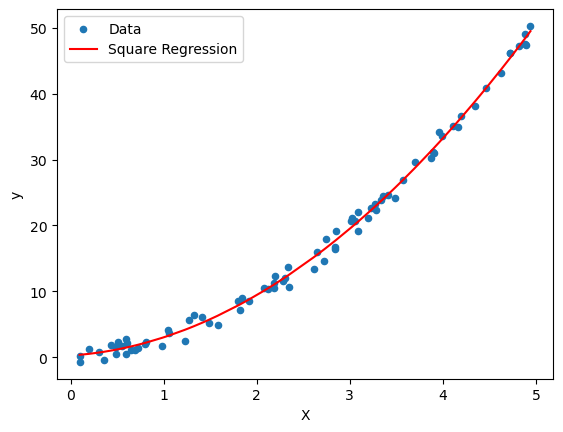

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = 2 * X**2 + 1 + np.random.randn(80, 1)

# Create the design matrix with polynomial features (degree=2)
# X_design = np.column_stack((np.ones_like(X), X, X**2))

# # Perform square regression using matrix operations
# coefficients = np.linalg.inv(X_design.T.dot(X_design)).dot(X_design.T).dot(y)
X_pred = X.copy()
X_pred = np.column_stack((np.ones_like(X_pred), X_pred, X_pred**2))
y_pred = X_pred.dot(quadratic_regression(X, y))

# Predictions
# X_pred = np.linspace(0, 5, 100)[:, np.newaxis]
# X_pred_design = np.column_stack((np.ones_like(X_pred), X_pred, X_pred**2))
# y_pred = X_pred_design.dot(coefficients)

# Plot the original data and regression curve
plt.scatter(X, y, s=20, label='Data')
plt.plot(X, y_pred, color='r', label='Square Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


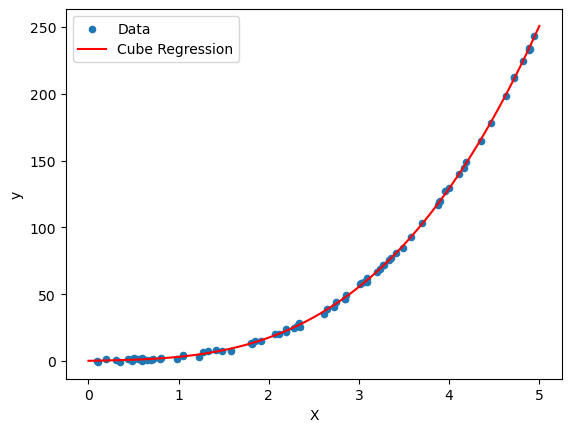

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = 2 * X**3 + 1 + np.random.randn(80, 1)

# Create the design matrix with polynomial features (degree=3)
X_design = np.column_stack((np.ones_like(X), X, X**2, X**3))

# Perform square regression using matrix operations
coefficients = np.linalg.inv(X_design.T.dot(X_design)).dot(X_design.T).dot(y)

# Predictions
X_pred = np.linspace(0, 5, 100)[:, np.newaxis]
X_pred_design = np.column_stack((np.ones_like(X_pred), X_pred, X_pred**2, X_pred**3))
y_pred = X_pred_design.dot(coefficients)

# Plot the original data and regression curve
plt.scatter(X, y, s=20, label='Data')
plt.plot(X_pred, y_pred, color='r', label='Cube Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

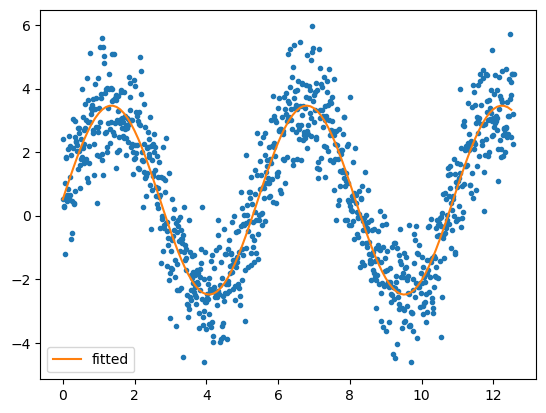

In [44]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

# guess_mean = np.mean(data)
# guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
# guess_phase = 0
# guess_freq = 1
# guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
# data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
# optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
# est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

est_amp, est_freq, est_phase, est_mean = sinusoidal_regression(t, data)

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
# plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='fitted')
plt.legend()
plt.show()
